In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from lightning_modules.BaseSdeGenerativeModel import BaseSdeGenerativeModel
from models.fcn import FCN
import pickle
import sde_lib

In [2]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
#from scipy.special import softmax as sipysoftmax


In [14]:
dim = 10
n_spheres = 1

log_path =f'logs/ksphere/dim_{dim}/n_{n_spheres}/random_isometry/'
for alpha in [1, 0.75, 0.5, 0]:

    log_name = f'non_uniform_{alpha}' if alpha > 0 else 'uniform_random'
    #log_name = 'uniform_random'

    config_path = log_path + log_name + '/config.pkl'
    with open(config_path, 'rb') as file:
        config = pickle.load(file)
    config.model.checkpoint_path = log_path  + log_name + "/checkpoints/best/last.ckpt"
    config.logging.log_path = log_path
    config.logging.log_name = log_name

    config.device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')


    path = log_path + log_name + '/svd/svd_14000.pkl'
    with open(path, 'rb') as f:
        svd = pickle.load(f)

    singular_values = svd['singular_values']

    dims = []
    for sing_vals in singular_values:
        difference = np.array([sing_vals[i-1] / sing_vals[i] for i in range(1, len(sing_vals))])
        probs = softmax(difference)
        d = len(probs) - np.argmax(probs)
        dims.append(d)


    plt.figure(figsize=(15,10))
    plt.rcParams.update({'font.size': 16})
    if alpha > 0:
        plt.title(f'Non-uniform distribution $\\alpha={alpha}$')
    else:
        plt.title(f'Uniform distribution')
    plt.grid(alpha=0.5)
    plt.bar(range(len(dims)), np.sort(dims))
    plt.xlabel('i-th point')
    plt.ylabel('Estimated dimension at i-th point')
    alpha_str =str(alpha).replace('.', '_')
    plt.savefig(f'figures/non_uniform_{alpha_str}', dpi=300, facecolor='white')
    #plt.show()

In [9]:
#path = 'logs/ksphere/dim_10/n_1/random_isometry/non_uniform_0.5_sig_0.005/svd/svd_13000.pkl'
#path = log_path + log_name + '/svd/svd_14000.pkl'
path = 'logs/ksphere/dim_[5, 30]/n_2/random_isometry/different_dims_different_radii/svd/svd_15500.pkl'
with open(path, 'rb') as f:
    svd = pickle.load(f)

singular_values = svd['singular_values']

In [12]:
dims = []
for sing_vals in singular_values:
    difference = np.array([sing_vals[i-1] - sing_vals[i] for i in range(1, len(sing_vals))])
    probs = softmax(difference)
    d = len(probs) - np.argmax(probs)
    dims.append(d)

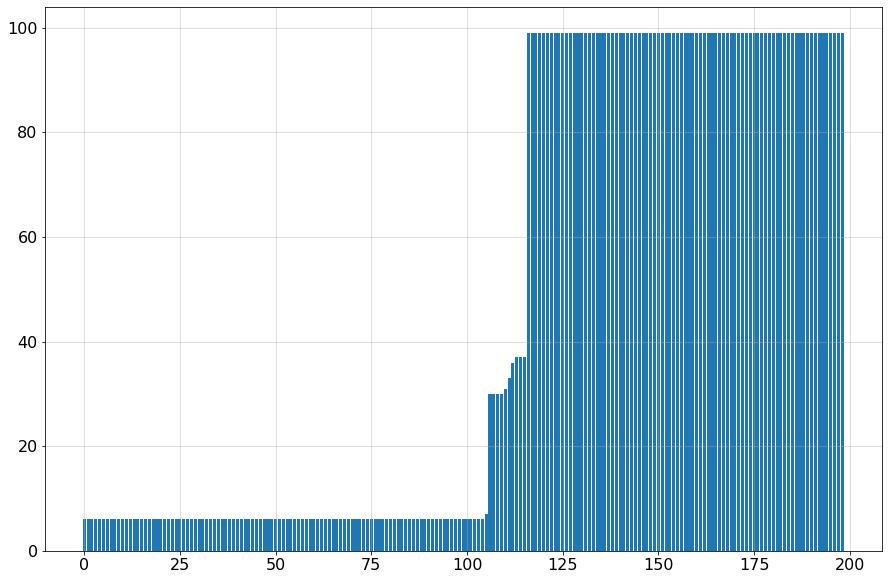

In [13]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 16})
#if alpha > 0:
#    plt.title(f'Non-uniform distribution $\\alpha={alpha}$')
#else:
#    plt.title(f'Uniform distribution')
plt.grid(alpha=0.5)
plt.bar(range(len(dims)), np.sort(dims))
#plt.xlabel('i-th point')
#plt.ylabel('Estimated dimension at i-th point')
#alpha_str =str(alpha).replace('.', '_')
#plt.savefig(f'figures/non_uniform_{alpha_str}', dpi=300, facecolor='white')
plt.show()

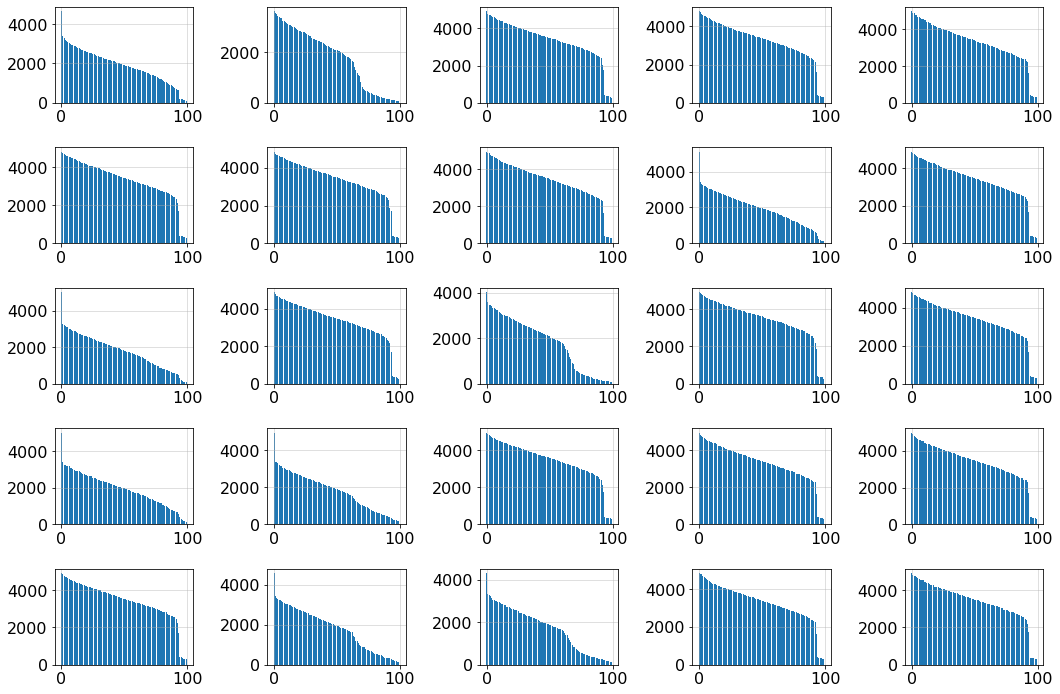

In [40]:
fig = plt.figure(figsize=(15,10))
for i, s in enumerate(singular_values[:25]):
    ax = fig.add_subplot(5, 5, i+1)
    #ax.rcParams.update({'font.size': 16})
    ax.grid(alpha=0.5)
    ax.bar(range(len(s)), s)
    #ax.xticks(range(0, 100, 5))
fig.tight_layout()
fig.show()